
# Tree-Grass ecosystem (Spain, Majadas de Tietar)
This example demonstrates how to load and visualize datasets related to
evapotranspiration (ETa) and land cover classification (CLC) over the Majadas
region in Spain. The datasets are loaded using Pooch for remote file management.
Two visualizations are created: one showing land cover classification (CLC) and
another displaying the time series of evapotranspiration (ETa).


In [1]:
import pooch
import xarray as xr 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Step 1: Download datasets using Pooch
Pooch is used to manage the dataset downloads from the specified GitHub repository.



In [2]:
pooch_Majadas = pooch.create(
    path=pooch.os_cache("Majadas_project"),
    base_url="https://github.com/BenjMy/test_Majadas_centum_dataset/raw/refs/heads/main/",
    registry={
        "20200403_LEVEL2_ECMWF_TPday.tif": None,
        "ETa_Majadas.netcdf": None,
        "ETp_Majadas.netcdf": None,
        "CLCover_Majadas.netcdf": None,
    },
)

Majadas_ETa_dataset = pooch_Majadas.fetch('ETa_Majadas.netcdf')
Majadas_ETp_dataset = pooch_Majadas.fetch('ETp_Majadas.netcdf')
Majadas_CLC_dataset = pooch_Majadas.fetch('CLCover_Majadas.netcdf')

ETa_ds = xr.load_dataset(Majadas_ETa_dataset)
ETa_ds = ETa_ds.rename({"__xarray_dataarray_variable__": "ETa"})  # Rename the main variable to 'ETa'
CLC = xr.load_dataset(Majadas_CLC_dataset)  # Load the CLC dataset

Step 2: Corine Land Cover Visualization



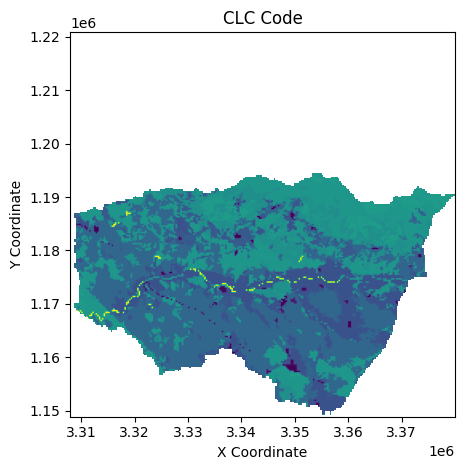

In [3]:
x_coords_CLC = CLC['Code_CLC'].coords['x'].values
y_coords_CLC = CLC['Code_CLC'].coords['y'].values

fig, ax = plt.subplots()
im1 = ax.imshow(CLC['Code_CLC'].values, cmap='viridis', aspect='auto', origin='upper',
                    extent=[x_coords_CLC.min(), x_coords_CLC.max(), y_coords_CLC.min(), y_coords_CLC.max()])
ax.set_title('CLC Code') 
ax.set_xlabel('X Coordinate') 
ax.set_ylabel('Y Coordinate') 
ax.axis('square')  #

plt.tight_layout()
plt.show()

Step 3: Create an animated visualization of the ETa time series



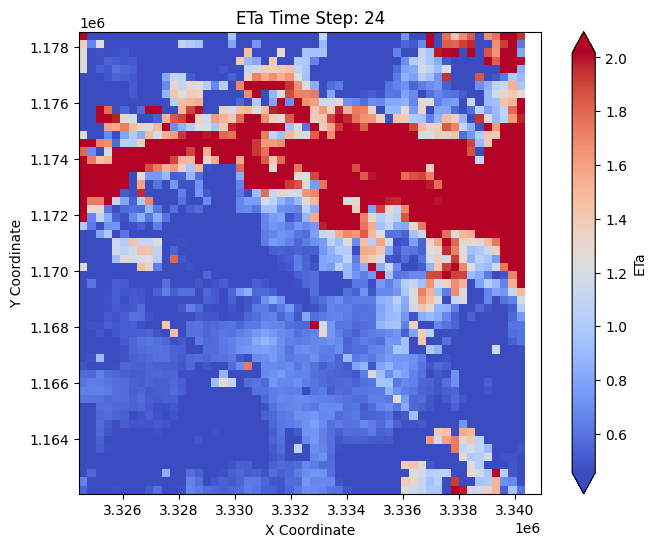

In [4]:
ETa_ds_selec = ETa_ds.isel(time=slice(0, 25))
x_coords = ETa_ds_selec['ETa'].coords['x'].values
y_coords = ETa_ds_selec['ETa'].coords['y'].values

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(ETa_ds_selec['ETa'].isel(band=0).isel(time=0).values, cmap='coolwarm', origin='upper',
               extent=[x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()])
ax.set_title('ETa Time Series')  # Title for the time series plot
ax.set_xlabel('X Coordinate')  # Label for the X axis
ax.set_ylabel('Y Coordinate')  # Label for the Y axis
ax.axis('square')  # Make the axis square for proper aspect ratio

cbar = fig.colorbar(im, ax=ax, orientation='vertical', extend='both', label='ETa')

def update(frame):
    im.set_data(ETa_ds_selec['ETa'].isel(band=0).isel(time=frame).values)
    ax.set_title(f'ETa Time Step: {frame}')
    return [im]

ani = FuncAnimation(fig, update, frames=len(ETa_ds_selec['time']), interval=200, blit=True)
HTML(ani.to_jshtml())  # Show the animation in the notebook